# Data work

In [1]:
import pandas as pd

data = "top50.csv"
spotify_df = pd.read_csv(data, encoding='ISO-8859-1')

In [2]:
spotify_df["Track.Name"] = spotify_df["Track.Name"].str.strip().str.lower()

In [3]:
def clean_genres(x: str) -> str:
    x = str(x).lower().strip()
    
    if any(word in x for word in ["canadian pop", "australian pop", "pop", "dance pop", "boy band"]):
        return "pop"
    if any(word in x for word in ["dfw rap", "country rap", "rap", "trap music"]):
        return "rap"
    if any(word in x for word in ["canadian hip hop", "atl hip hop", "hip hop"]):
        return "hip hop"
    if any(word in x for word in ["brostep", "big room", "edm", "electropop", "escape room", "pop house"]):
        return "edm"
    if any(word in x for word in ["latin", "panamanian pop", "reggaeton", "reggaeton flow", "r&b en espanol"]):
        return "latin"


In [4]:
spotify_df["Genre"] = spotify_df["Genre"].apply(clean_genres)

In [5]:
spotify_df.columns = (

    spotify_df.columns

      .str.lower()

      .str.normalize('NFKD')        # quita acentos

      .str.encode('ascii', errors='ignore')

      .str.decode('utf-8')

      .str.replace('.', '_')

      .str.replace('[^0-9a-zA-Z_]', '')

)


In [6]:
spotify_df = spotify_df.drop(columns=['unnamed: 0'])

In [7]:
spotify_df["collaboration"] = spotify_df["track_name"].str.contains(r"remix|feat|ft.|with", case=False, na=False)
spotify_df["collaboration"] = spotify_df["collaboration"].map({True: "yes", False: "no"})

In [8]:
spotify_df.loc[spotify_df['track_name'] == '0.958333333333333', 'track_name'] = 'HP'


In [9]:
spotify_df = spotify_df.rename(columns=
            { 'track_name': 'song_title', 'artist_name': 'artist_name',
             'genre': 'genre_name','beats_per_minute': 'bpm', 'energy': 'energy', 
             'danceability': 'danceability', 'loudness__db__': 'loudness', 
             'liveness':'liveness', 'valence_': 'valence', 'length_': 'length_ms', 
             'acousticness__': 'accousticness', 'speechiness_': 'speechiness','popularity': 'popularity' })


In [10]:
spotify_df["song_id"] = range(1, len(spotify_df) +1)


In [11]:
spotify_df["artist_id"] = range(1, len(spotify_df) +1)

def genre_to_id(item):
    if item == 'pop':
        return 1
    elif item == 'latin':
        return 2
    elif item == 'rap':
        return 3
    elif item == 'edm':
        return 4
    else:
        return 5

spotify_df['genre_id'] = spotify_df['genre_name'].apply(genre_to_id)



In [12]:
spotify_df["song_title"] = spotify_df["song_title"].replace("señorita", "senorita")
spotify_df["song_title"] = spotify_df["song_title"].replace("te robaré", "te robare")
spotify_df["song_title"] = spotify_df["song_title"].replace("la canción", "la cancion")
spotify_df["song_title"] = spotify_df["song_title"].replace("boyfriend (with social house)", "boyfriend with social house")
spotify_df["song_title"] = spotify_df["song_title"].replace("beautiful people (feat. khalid)", "beautiful people feat khalid")
spotify_df["song_title"] = spotify_df["song_title"].replace("goodbyes (feat. young thug)", "goodbyes feat young thug")
spotify_df["song_title"] = spotify_df["song_title"].replace("i don't care (with justin bieber)", "i do not care with justin bieber")
spotify_df["song_title"] = spotify_df["song_title"].replace("how do you sleep?", "how do you sleep")
spotify_df["song_title"] = spotify_df["song_title"].replace("old town road - remix", "old town road remix")
spotify_df["song_title"] = spotify_df["song_title"].replace("loco contigo (feat. j. balvin & tyga)", "loco contigo feat j balvin and tyga")
spotify_df["song_title"] = spotify_df["song_title"].replace("otro trago - remix", "otro trago remix")
spotify_df["song_title"] = spotify_df["song_title"].replace("money in the grave (drake ft. rick ross)", "money in the grave drake ft rick ross")
spotify_df["song_title"] = spotify_df["song_title"].replace("no guidance (feat. drake)", "no guidance feat drake")
spotify_df["song_title"] = spotify_df["song_title"].replace("sunflower - spider-man: into the spider-verse", "sunflower")
spotify_df["song_title"] = spotify_df["song_title"].replace("no me conoce - remix", "no me conoce remix")
spotify_df["song_title"] = spotify_df["song_title"].replace("soltera - remix", "soltera remix")
spotify_df["song_title"] = spotify_df["song_title"].replace("bad guy (with justin bieber)", "bad guy with justin bieber")
spotify_df["song_title"] = spotify_df["song_title"].replace("if i can't have you", "if i can not have you")
spotify_df["song_title"] = spotify_df["song_title"].replace("it's you", "it is you")
spotify_df["song_title"] = spotify_df["song_title"].replace("the london (feat. j. cole & travis scott)", "the london feat j cole and travis scott")
spotify_df["song_title"] = spotify_df["song_title"].replace("antisocial (with travis scott)", "antisocial with travis scott")
spotify_df["song_title"] = spotify_df["song_title"].replace("cross me (feat. chance the rapper & pnb rock)", "cross me feat chance the rapper and pnb rock")
spotify_df["song_title"] = spotify_df["song_title"].replace("fuck, i'm lonely (with anne-marie) - from \x9313 reasons why: season 3\x94", "fuck i am lonely with anne marie from 13 reasons why season 3")
spotify_df["song_title"] = spotify_df["song_title"].replace("summer days (feat. macklemore & patrick stump of fall out boy)", "summer days feat macklemore and patrick stump of fall out boy")

spotify_df["artist_name"] = spotify_df["artist_name"].replace("ROSALÍA", "Rosalia")


display(spotify_df)

,song_title,artist_name,genre_name,bpm,energy,danceability,loudness,liveness,valence,length_ms,accousticness,speechiness,popularity,collaboration,song_id,artist_id,genre_id
0,senorita,Shawn Mendes,pop,117,55,76,-6,8,75,191,4,3,79,no,1,1,1
1,china,Anuel AA,latin,105,81,79,-4,8,61,302,8,9,92,no,2,2,2
2,boyfriend with social house,Ariana Grande,pop,190,80,40,-4,16,70,186,12,46,85,yes,3,3,1
3,beautiful people feat khalid,Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,yes,4,4,1
4,goodbyes feat young thug,Post Malone,rap,150,65,58,-4,11,18,175,45,7,94,yes,5,5,3
5,i do not care with justin bieber,Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84,yes,6,6,1
6,ransom,Lil Tecca,rap,180,64,75,-6,7,23,131,2,29,92,no,7,7,3
7,how do you sleep,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90,no,8,8,1
8,old town road remix,Lil Nas X,rap,136,62,88,-6,11,64,157,5,10,87,yes,9,9,3
9,bad guy,Billie Eilish,pop,135,43,70,-11,10,56,194,33,38,95,no,10,10,1


In [13]:
artist_columns = ["artist_id", "artist_name"]
genre_columns = ["genre_id", "genre_name"]

artist_df = spotify_df[artist_columns]
genre_df = spotify_df[genre_columns].drop_duplicates().sort_values("genre_id").reset_index(drop=True)

display(artist_df)
display(genre_df)

,artist_id,artist_name
0,1,Shawn Mendes
1,2,Anuel AA
2,3,Ariana Grande
3,4,Ed Sheeran
4,5,Post Malone
5,6,Ed Sheeran
6,7,Lil Tecca
7,8,Sam Smith
8,9,Lil Nas X
9,10,Billie Eilish


,genre_id,genre_name
0,1,pop
1,2,latin
2,3,rap
3,4,edm
4,5,hip hop


In [14]:
song_columns = ["song_id", "genre_id", "artist_id", "song_title", "bpm", "energy", "danceability", "loudness", "liveness", "valence", "length_ms", "accousticness", "speechiness", "popularity", "collaboration"] 

song_df = spotify_df[song_columns]

display(song_df)

,song_id,genre_id,artist_id,song_title,bpm,energy,danceability,loudness,liveness,valence,length_ms,accousticness,speechiness,popularity,collaboration
0,1,1,1,senorita,117,55,76,-6,8,75,191,4,3,79,no
1,2,2,2,china,105,81,79,-4,8,61,302,8,9,92,no
2,3,1,3,boyfriend with social house,190,80,40,-4,16,70,186,12,46,85,yes
3,4,1,4,beautiful people feat khalid,93,65,64,-8,8,55,198,12,19,86,yes
4,5,3,5,goodbyes feat young thug,150,65,58,-4,11,18,175,45,7,94,yes
5,6,1,6,i do not care with justin bieber,102,68,80,-5,9,84,220,9,4,84,yes
6,7,3,7,ransom,180,64,75,-6,7,23,131,2,29,92,no
7,8,1,8,how do you sleep,111,68,48,-5,8,35,202,15,9,90,no
8,9,3,9,old town road remix,136,62,88,-6,11,64,157,5,10,87,yes
9,10,1,10,bad guy,135,43,70,-11,10,56,194,33,38,95,no


In [15]:
song_df.to_csv("song.csv", index=False, encoding='utf-8')

In [16]:
genre_df.to_csv("genre.csv", index=False, encoding='utf-8')

In [17]:
artist_df.to_csv("artist.csv", index=False, encoding='utf-8')

In [18]:
# spotify_df.to_csv('spotify_project_utf8.csv', index=False, encoding='utf-8')

In [19]:
# assuming song_df, artist_df, genre_df are pandas dataframes

song_df[~song_df["artist_id"].isin(artist_df["artist_id"])]


,song_id,genre_id,artist_id,song_title,bpm,energy,danceability,loudness,liveness,valence,length_ms,accousticness,speechiness,popularity,collaboration


In [20]:
song_df[~song_df["genre_id"].isin(genre_df["genre_id"])]

,song_id,genre_id,artist_id,song_title,bpm,energy,danceability,loudness,liveness,valence,length_ms,accousticness,speechiness,popularity,collaboration


# Analysis

## Basic casting of dataframe

In [21]:
spotify_df.dtypes

song_title       object
artist_name      object
genre_name       object
bpm               int64
energy            int64
danceability      int64
loudness          int64
liveness          int64
valence           int64
length_ms         int64
accousticness     int64
speechiness       int64
popularity        int64
collaboration    object
song_id           int64
artist_id         int64
genre_id          int64
dtype: object

In [22]:
spotify_df["song_title"] = spotify_df["song_title"].astype("string")
spotify_df["artist_name"] = spotify_df["artist_name"].astype("string")
spotify_df["genre_name"] = spotify_df["genre_name"].astype("string")
spotify_df = spotify_df.drop(columns=["song_id", "genre_id", "artist_id"])
spotify_df

,song_title,artist_name,genre_name,bpm,energy,danceability,loudness,liveness,valence,length_ms,accousticness,speechiness,popularity,collaboration
0,senorita,Shawn Mendes,pop,117,55,76,-6,8,75,191,4,3,79,no
1,china,Anuel AA,latin,105,81,79,-4,8,61,302,8,9,92,no
2,boyfriend with social house,Ariana Grande,pop,190,80,40,-4,16,70,186,12,46,85,yes
3,beautiful people feat khalid,Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,yes
4,goodbyes feat young thug,Post Malone,rap,150,65,58,-4,11,18,175,45,7,94,yes
5,i do not care with justin bieber,Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84,yes
6,ransom,Lil Tecca,rap,180,64,75,-6,7,23,131,2,29,92,no
7,how do you sleep,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90,no
8,old town road remix,Lil Nas X,rap,136,62,88,-6,11,64,157,5,10,87,yes
9,bad guy,Billie Eilish,pop,135,43,70,-11,10,56,194,33,38,95,no


In [23]:
# 1. Binary encode collaboration: yes/no -> 1/0
spotify_df["collaboration"] = (
    spotify_df["collaboration"]
        .astype("string")
        .str.strip()
        .str.lower()
        .map({"no": 0, "yes": 1})
)
spotify_df

,song_title,artist_name,genre_name,bpm,energy,danceability,loudness,liveness,valence,length_ms,accousticness,speechiness,popularity,collaboration
0,senorita,Shawn Mendes,pop,117,55,76,-6,8,75,191,4,3,79,0
1,china,Anuel AA,latin,105,81,79,-4,8,61,302,8,9,92,0
2,boyfriend with social house,Ariana Grande,pop,190,80,40,-4,16,70,186,12,46,85,1
3,beautiful people feat khalid,Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,1
4,goodbyes feat young thug,Post Malone,rap,150,65,58,-4,11,18,175,45,7,94,1
5,i do not care with justin bieber,Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84,1
6,ransom,Lil Tecca,rap,180,64,75,-6,7,23,131,2,29,92,0
7,how do you sleep,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90,0
8,old town road remix,Lil Nas X,rap,136,62,88,-6,11,64,157,5,10,87,1
9,bad guy,Billie Eilish,pop,135,43,70,-11,10,56,194,33,38,95,0


## Regression (inference type) analysis

In [24]:
spotify_df.dtypes

song_title       string[python]
artist_name      string[python]
genre_name       string[python]
bpm                       int64
energy                    int64
danceability              int64
loudness                  int64
liveness                  int64
valence                   int64
length_ms                 int64
accousticness             int64
speechiness               int64
popularity                int64
collaboration             int64
dtype: object

In [43]:
spotify_df

,song_title,artist_name,genre_name,bpm,energy,danceability,loudness,liveness,valence,length_ms,accousticness,speechiness,popularity,collaboration,is_top20
0,senorita,Shawn Mendes,pop,117,55,76,-6,8,75,191,4,3,79,0,0
1,china,Anuel AA,latin,105,81,79,-4,8,61,302,8,9,92,0,1
2,boyfriend with social house,Ariana Grande,pop,190,80,40,-4,16,70,186,12,46,85,1,0
3,beautiful people feat khalid,Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,1,0
4,goodbyes feat young thug,Post Malone,rap,150,65,58,-4,11,18,175,45,7,94,1,1
5,i do not care with justin bieber,Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84,1,0
6,ransom,Lil Tecca,rap,180,64,75,-6,7,23,131,2,29,92,0,1
7,how do you sleep,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90,0,1
8,old town road remix,Lil Nas X,rap,136,62,88,-6,11,64,157,5,10,87,1,0
9,bad guy,Billie Eilish,pop,135,43,70,-11,10,56,194,33,38,95,0,1


In [33]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 0. Work on a copy of the original dataframe
spotify_df = spotify_df.copy()

# 1. Binary encode collaboration: yes/no -> 1/0 check
spotify_df["collaboration"] = pd.to_numeric(
    spotify_df["collaboration"],
    errors="raise"
)

# 2. One-hot encode genre_name (drop_first to avoid dummy-variable trap)
genre_dummies = pd.get_dummies(
    spotify_df["genre_name"],
    prefix="genre",
    drop_first=True
)

# 3. Numeric predictors (without popularity, which is the target)
numeric_cols = [
    "bpm",
    "energy",
    "danceability",
    "loudness",
    "liveness",
    "valence",
    "length_ms",
    "accousticness",
    "speechiness",
]

# 4.  casting series data types to be numerical
# for col in numeric_cols + ["collaboration", "popularity"]:
    # spotify_df[col] = pd.to_numeric(spotify_df[col], errors="coerce")

#5. Build design matrix X and target y
X = pd.concat(
    [
        spotify_df[numeric_cols],
        genre_dummies,
    ],
    axis=1
)
y = spotify_df["popularity"]

X = X.astype(float)
y = y.astype(float)

# 6. Add intercept and fit OLS regression
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# 7. Inspect results
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     1.704
Date:                Thu, 04 Dec 2025   Prob (F-statistic):              0.102
Time:                        11:38:58   Log-Likelihood:                -133.56
No. Observations:                  50   AIC:                             295.1
Df Residuals:                      36   BIC:                             321.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            90.0372      9.416      9.562

### In summary: nothing in these results supports a strong claim about which attributes drive popularity. The coefficients do not stabilize; significance is absent; the model complexity is too high relative to sample size.

## Descriptive diagnostics

### Taking a look at our table

In [26]:
spotify_df

,song_title,artist_name,genre_name,bpm,energy,danceability,loudness,liveness,valence,length_ms,accousticness,speechiness,popularity,collaboration
0,senorita,Shawn Mendes,pop,117,55,76,-6,8,75,191,4,3,79,0
1,china,Anuel AA,latin,105,81,79,-4,8,61,302,8,9,92,0
2,boyfriend with social house,Ariana Grande,pop,190,80,40,-4,16,70,186,12,46,85,1
3,beautiful people feat khalid,Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,1
4,goodbyes feat young thug,Post Malone,rap,150,65,58,-4,11,18,175,45,7,94,1
5,i do not care with justin bieber,Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84,1
6,ransom,Lil Tecca,rap,180,64,75,-6,7,23,131,2,29,92,0
7,how do you sleep,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90,0
8,old town road remix,Lil Nas X,rap,136,62,88,-6,11,64,157,5,10,87,1
9,bad guy,Billie Eilish,pop,135,43,70,-11,10,56,194,33,38,95,0


### Coorrelation matrix

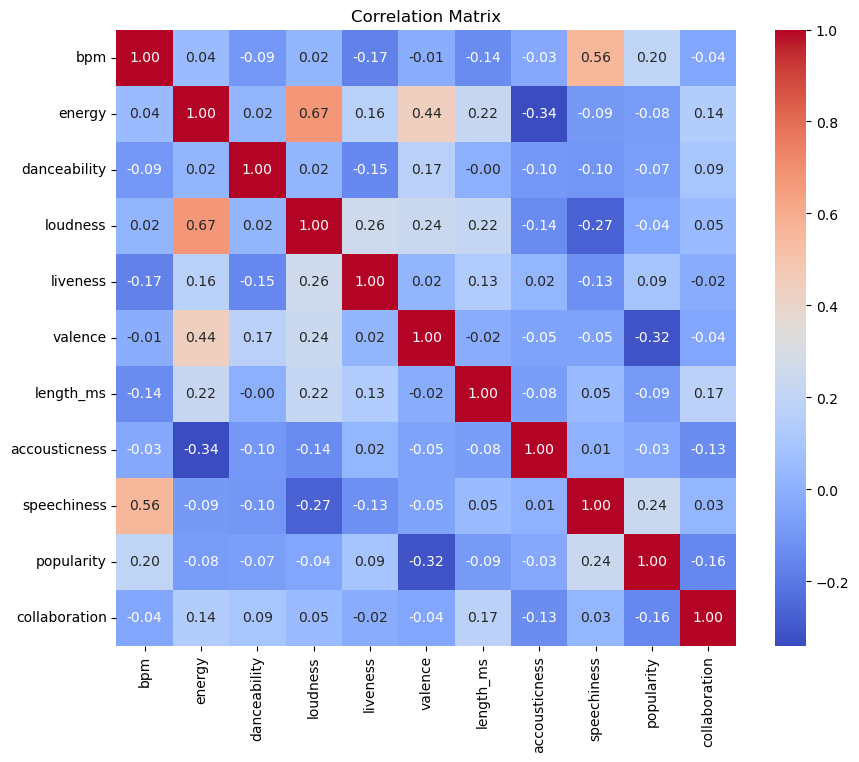

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# numeric only
num_cols = spotify_df.select_dtypes(include="number").columns
corr = spotify_df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


#### Interpretation (keeping in mind N=50, so everything is noisy):

##### No strong correlations
##### Everything is between roughly -0.3 and +0.2.
##### In practical terms: none of these audio features linearly explain popularity in a meaningful way.

#### The largest (still small) values:
#####    -valence ≈ -0.32
#####    -Slight negative association. Higher “happiness” correlates weakly with lower popularity in your sample, but with 50, songs this could easily be noise.

#### accousticness ≈ +0.24
#####    -Mild positive correlation: the more acoustic pieces in the dataset tend to be slightly more popular.

#### bpm ≈ +0.20
#####    -Faster songs may be slightly more popular.

#### collaboration ≈ -0.16
#####    -Weak negative association: collaborations in your sample tend to be a bit less popular.

#### Speechiness, danceability, loudness, energy – nothing meaningful
#####    -These hover around zero. In small datasets this usually means no stable linear relationship.

### Variance Inflation Factors

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# predictors only
X = spotify_df[num_cols].drop(columns=["popularity"])  # exclude target
X = X.astype(float)

vif_df = pd.DataFrame({
    "feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print(vif_df)


         feature        VIF
0            bpm  21.200661
1         energy  37.226163
2   danceability  31.839429
3       loudness  10.099575
4       liveness   3.000245
5        valence   9.627484
6      length_ms  27.151679
7  accousticness   2.576736
8    speechiness   3.643940
9  collaboration   1.630847


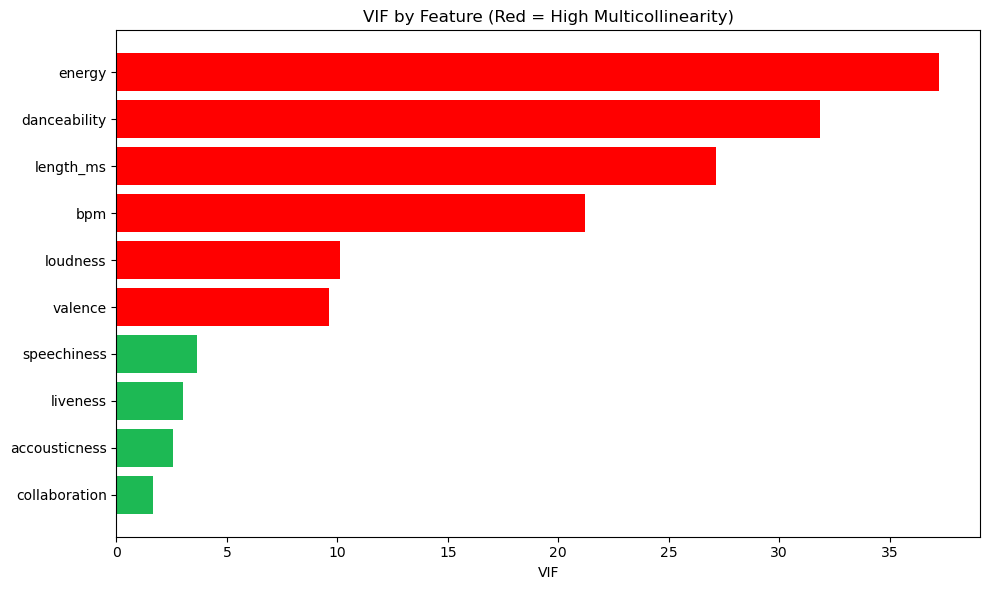

In [44]:
import matplotlib.pyplot as plt

vif_sorted = vif_df.sort_values("VIF", ascending=True)  # ascending reads better horizontally

colors = [
    "red" if v > 9 else "#1DB954"
    for v in vif_sorted["VIF"]
]

plt.figure(figsize=(10, 6))
plt.barh(vif_sorted["feature"], vif_sorted["VIF"], color=colors)
plt.xlabel("VIF")
plt.title("VIF by Feature (Red = High Multicollinearity)")
plt.tight_layout()
plt.show()



#### Interpretation:

1. energy (37), danceability (32), length_ms (27), bpm (21)
These are extremely collinear.
In plain terms: these variables move together so strongly that in a regression they cannot be given separate, stable coefficients. This is why your OLS output lacked significance—nothing can be estimated reliably because these predictors overlap in information content.

2. loudness (10), valence (9.6)
borderline problematic. They also overlap with other features.

3. liveness, accousticness, speechiness, collaboration
These are the only reasonably independent predictors (VIF < 5).

#### Therefore we should:

#### Reduce dimensionality.
#### Options:

##### - keep only predictors with VIF < 5

##### - combine correlated predictors into composites (e.g., energy + loudness to intensity)

##### - use PCA to create orthogonal factors

### Split popularity into two groups (top 20, rest of 30)

In [37]:
spotify_df["is_top20"] = (spotify_df["popularity"].rank(ascending=False) <= 20).astype(int)
group_means = spotify_df.groupby("is_top20")[num_cols].mean()
print(group_means)



                 bpm     energy  danceability  loudness   liveness    valence  \
is_top20                                                                        
0         114.588235  63.529412     71.411765 -5.823529  15.764706  56.941176   
1         131.687500  65.187500     71.312500 -5.312500  12.312500  49.625000   

           length_ms  accousticness  speechiness  popularity  collaboration  
is_top20                                                                     
0         202.647059      22.147059    11.411765   85.588235       0.411765  
1         197.375000      22.187500    14.750000   91.562500       0.187500  


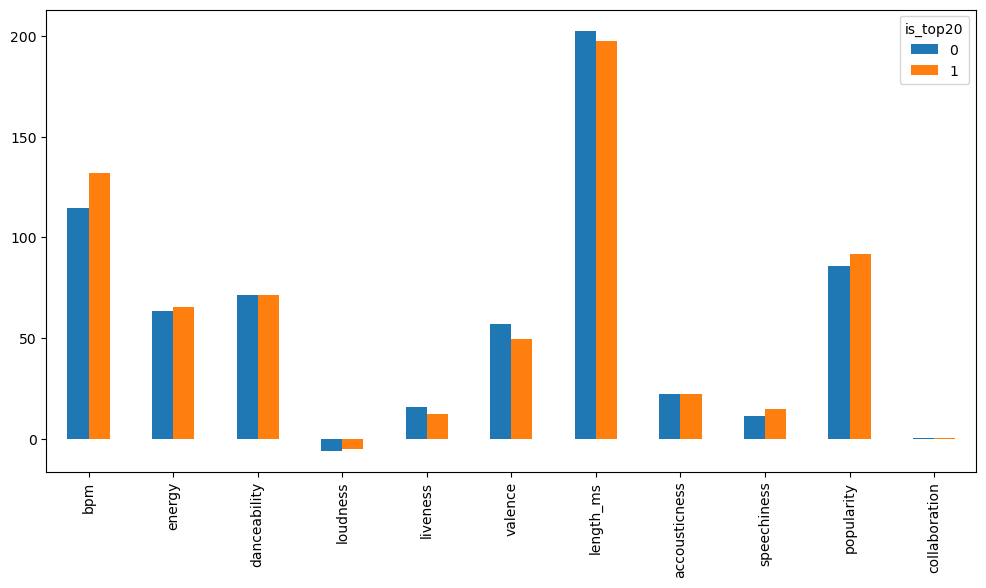

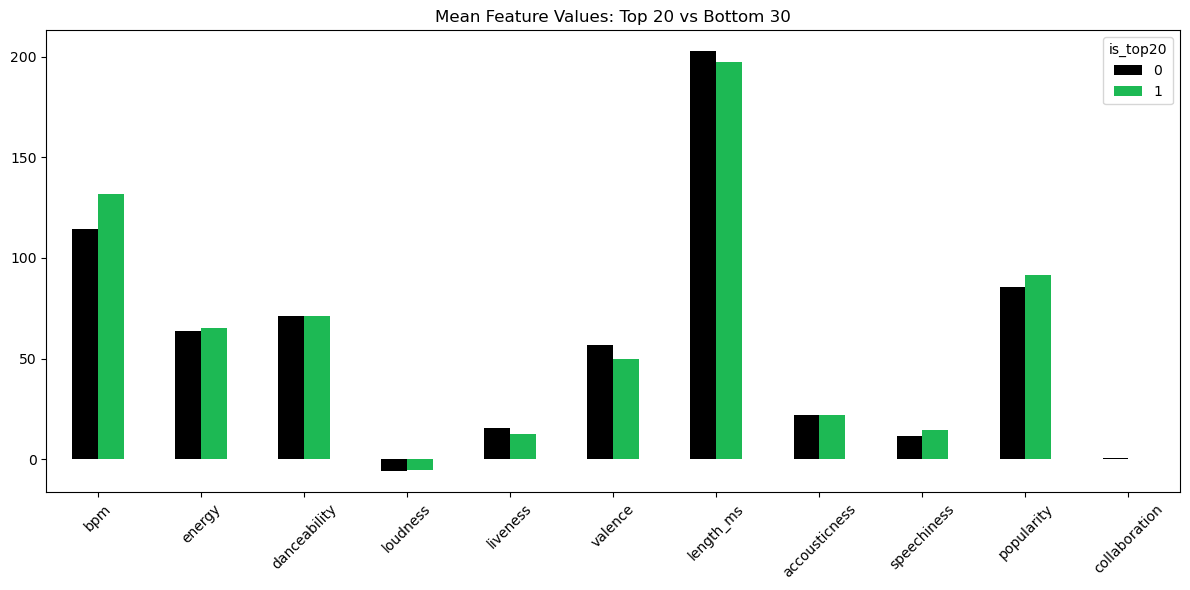

In [46]:
group_means.T.plot(kind="bar", figsize=(12, 6))

colors = ["black" if col == 0 else "#1DB954" for col in group_means.T.columns]

ax = group_means.T.plot(
    kind="bar",
    figsize=(12, 6),
    color=colors
)

ax.set_title("Mean Feature Values: Top 20 vs Bottom 30")
plt.xticks(rotation=45)

# Optional: nicer legend labels
# ax.legend(["Bottom 30", "Top 20"], title="Group")

plt.tight_layout()
plt.show()

#### Outcome:
##### here we see that there are no real differences between top20 and rest of 30

### We move on to a regression with low-VIF predictors

In [39]:
import pandas as pd
import statsmodels.api as sm

spotify_df = spotify_df.copy()

# Use only low-VIF predictors
predictors = ["liveness", "accousticness", "speechiness", "collaboration"]

X = spotify_df[predictors].astype(float)
y = spotify_df["popularity"].astype(float)

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.278
Date:                Thu, 04 Dec 2025   Prob (F-statistic):              0.293
Time:                        12:10:56   Log-Likelihood:                -142.86
No. Observations:                  50   AIC:                             295.7
Df Residuals:                      45   BIC:                             305.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            86.3353      1.604     53.809

### Hypothesis 1 and 6

#### Genre & Popularity

In [47]:
pop_df = spotify_df.copy()

# Sort popularity descending and take top 50
top50 = pop_df.sort_values("popularity", ascending=False).head(50)

# Count songs per genre in the top 50
genre_counts = top50["genre_name"].value_counts()

# Percentage share of each genre in the top 50
genre_percent = top50["genre_name"].value_counts(normalize=True) * 100

# Mean popularity per genre (within the top 50)
genre_mean_pop = top50.groupby("genre_name")["popularity"].mean()

print("Songs per genre in Top 50:\n", genre_counts, "\n")
print("Percentage share in Top 50:\n", genre_percent.round(2), "\n")
print("Average popularity per genre in Top 50:\n", genre_mean_pop.round(2))

Songs per genre in Top 50:
 genre_name
pop        24
latin      10
edm         7
rap         5
hip hop     4
Name: count, dtype: Int64 

Percentage share in Top 50:
 genre_name
pop        48.0
latin      20.0
edm        14.0
rap        10.0
hip hop     8.0
Name: proportion, dtype: Float64 

Average popularity per genre in Top 50:
 genre_name
edm        88.0
hip hop    89.5
latin      89.4
pop        85.5
rap        91.0
Name: popularity, dtype: float64


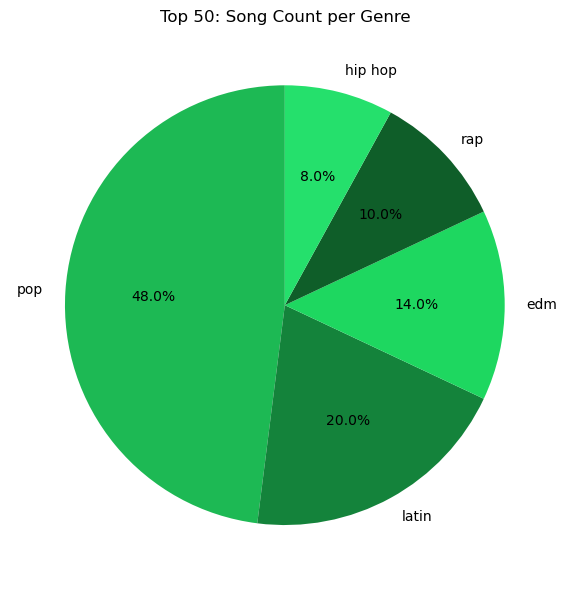

<Figure size 640x480 with 0 Axes>

In [52]:
colors_spotify = ["#1DB954", "#14833b", "#1ed760", "#0f5e29", "#25e06c"]

plt.figure(figsize=(6, 6))
plt.pie(
    genre_counts,
    labels=genre_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors_spotify[:len(genre_counts)]
)
plt.title("Top 50: Song Count per Genre")
plt.tight_layout()
plt.show()

plt.savefig("genre_counts_pie.png", dpi=300, transparent=True, bbox_inches="tight")
plt.show()

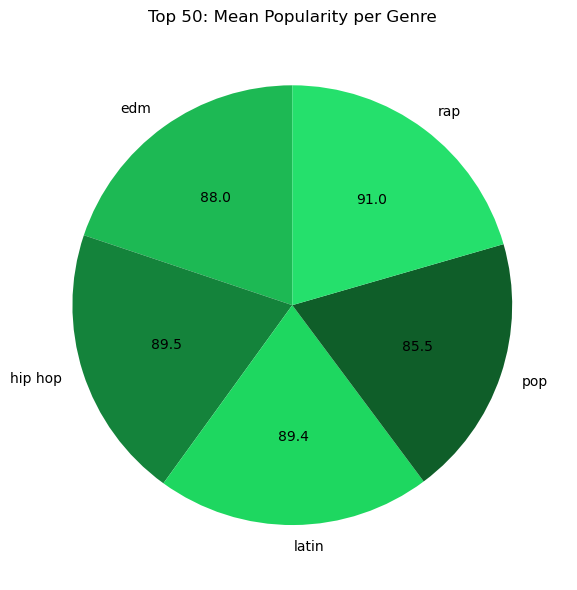

In [67]:
colors_spotify = ["#1DB954", "#14833b", "#1ed760", "#0f5e29", "#25e06c"]

def make_autopct(values):
    total = sum(values)
    def _autopct(pct):
        val = pct / 100.0 * total
        return f"{val:.1f}"  # mean popularity with 1 decimal
    return _autopct

plt.figure(figsize=(6, 6))
plt.pie(
    genre_mean_pop,
    labels=genre_mean_pop.index,
    autopct=make_autopct(genre_mean_pop),
    startangle=90,
    colors=colors_spotify[:len(genre_mean_pop)]
)
plt.title("Top 50: Mean Popularity per Genre")
plt.tight_layout()

plt.savefig("mean_popularity_pie.png", dpi=300, transparent=True, bbox_inches="tight")
plt.show()


#### Collaboration & Popularity

In [55]:
collab_df = spotify_df.copy()

collab_df.groupby("collaboration")["popularity"].mean()


collaboration
0    88.000000
1    86.529412
Name: popularity, dtype: float64

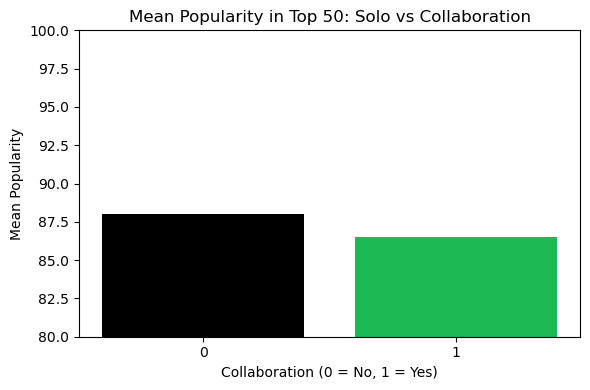

In [58]:
import matplotlib.pyplot as plt

means = top50.groupby("collaboration")["popularity"].mean()

colors = ["black", "#1DB954"]  # 0 → black, 1 → green

plt.figure(figsize=(6, 4))
plt.bar(
    means.index.astype(str),
    means.values,
    color=[colors[int(i)] for i in means.index]
)

plt.xlabel("Collaboration (0 = No, 1 = Yes)")
plt.ylabel("Mean Popularity")
plt.title("Mean Popularity in Top 50: Solo vs Collaboration")
plt.ylim(80, 100)
plt.tight_layout()
plt.show()

#### Scatter plots

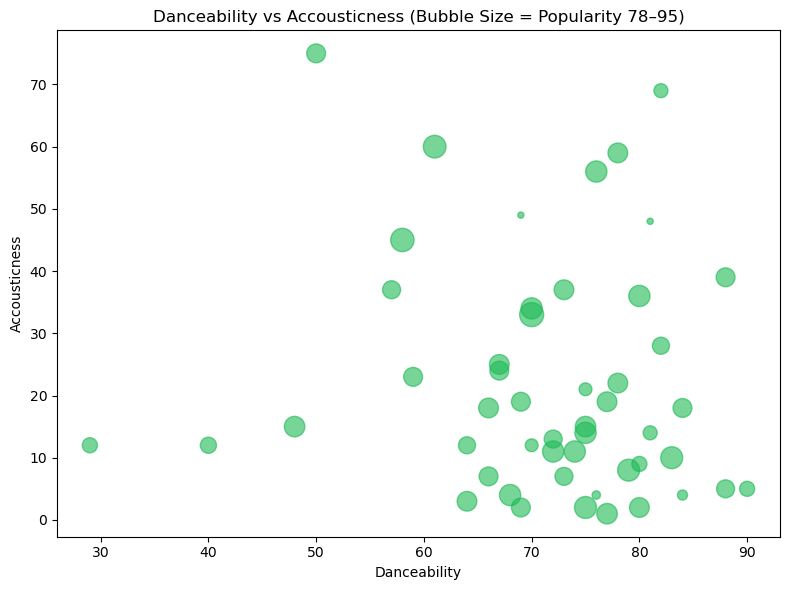

In [62]:
import matplotlib.pyplot as plt
import numpy as np

min_pop, max_pop = 78, 95          # range you care about
min_size, max_size = 20, 300       # marker areas (tune as you like)

pop = spotify_df["popularity"]

# clip popularity to [78, 95] so outliers don't blow up the scale
pop_clipped = pop.clip(lower=min_pop, upper=max_pop)

# normalize to [0, 1]
pop_norm = (pop_clipped - min_pop) / (max_pop - min_pop)

# map to [min_size, max_size]
sizes = min_size + pop_norm * (max_size - min_size)

plt.figure(figsize=(8, 6))
plt.scatter(
    spotify_df["danceability"],
    spotify_df["accousticness"],
    s=sizes,
    alpha=0.6,
    c="#1DB954"
)

plt.xlabel("Danceability")
plt.ylabel("Accousticness")
plt.title("Danceability vs Accousticness (Bubble Size = Popularity 78–95)")
plt.tight_layout()
plt.show()



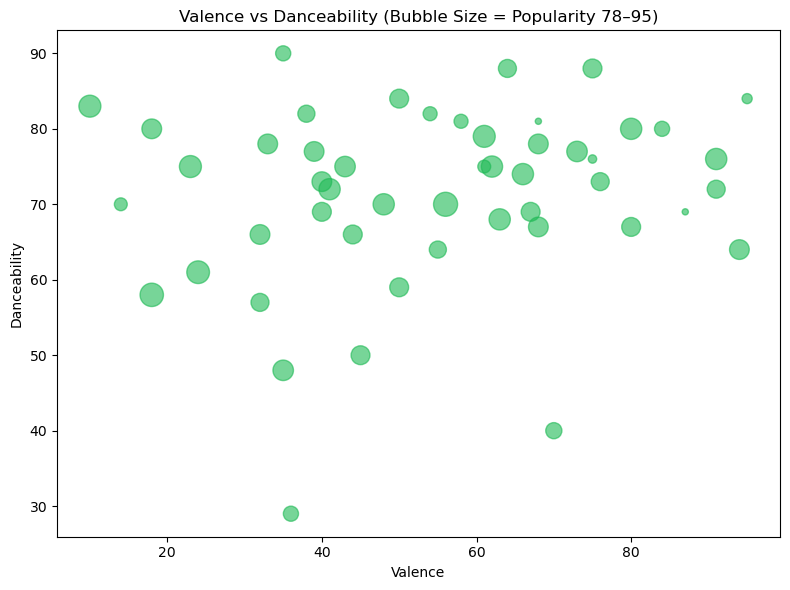

In [64]:
import matplotlib.pyplot as plt
import numpy as np

min_pop, max_pop = 78, 95          # range you care about
min_size, max_size = 20, 300       # marker areas (tune as you like)

pop = spotify_df["popularity"]

# clip popularity to [78, 95] so outliers don't blow up the scale
pop_clipped = pop.clip(lower=min_pop, upper=max_pop)

# normalize to [0, 1]
pop_norm = (pop_clipped - min_pop) / (max_pop - min_pop)

# map to [min_size, max_size]
sizes = min_size + pop_norm * (max_size - min_size)

plt.figure(figsize=(8, 6))
plt.scatter(
    spotify_df["valence"],
    spotify_df["danceability"],
    s=sizes,
    alpha=0.6,
    c="#1DB954"
)

plt.xlabel("Valence")
plt.ylabel("Danceability")
plt.title("Valence vs Danceability (Bubble Size = Popularity 78–95)")
plt.tight_layout()
plt.show()

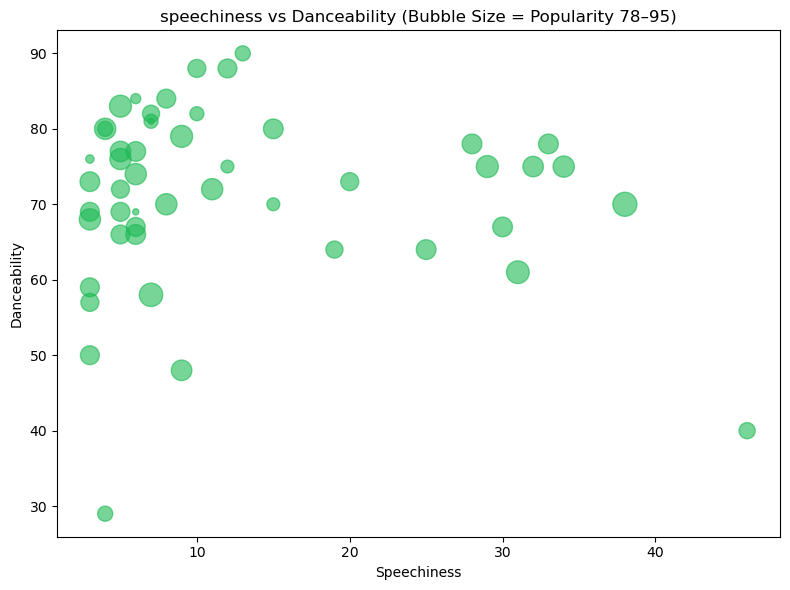

In [65]:
import matplotlib.pyplot as plt
import numpy as np

min_pop, max_pop = 78, 95          # range you care about
min_size, max_size = 20, 300       # marker areas (tune as you like)

pop = spotify_df["popularity"]

# clip popularity to [78, 95] so outliers don't blow up the scale
pop_clipped = pop.clip(lower=min_pop, upper=max_pop)

# normalize to [0, 1]
pop_norm = (pop_clipped - min_pop) / (max_pop - min_pop)

# map to [min_size, max_size]
sizes = min_size + pop_norm * (max_size - min_size)

plt.figure(figsize=(8, 6))
plt.scatter(
    spotify_df["speechiness"],
    spotify_df["danceability"],
    s=sizes,
    alpha=0.6,
    c="#1DB954"
)

plt.xlabel("Speechiness")
plt.ylabel("Danceability")
plt.title("speechiness vs Danceability (Bubble Size = Popularity 78–95)")
plt.tight_layout()
plt.show()

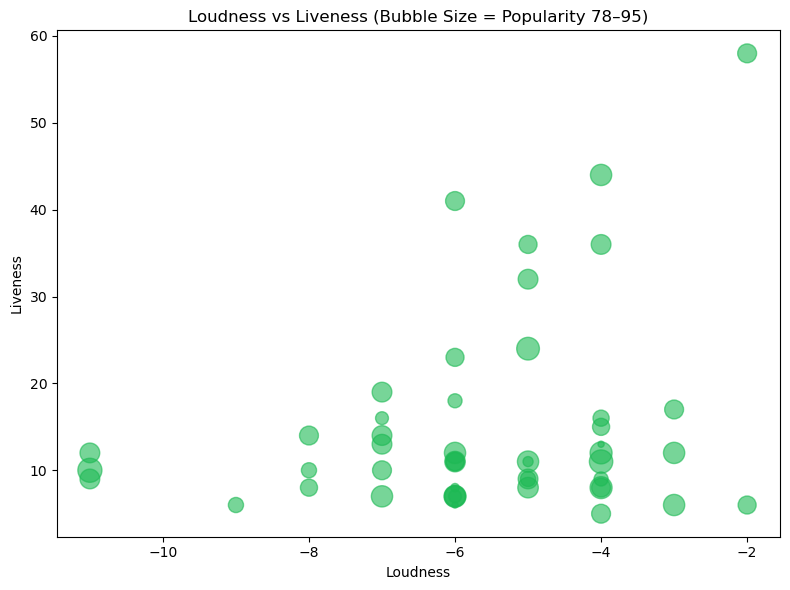

In [66]:
import matplotlib.pyplot as plt
import numpy as np

min_pop, max_pop = 78, 95          # range you care about
min_size, max_size = 20, 300       # marker areas (tune as you like)

pop = spotify_df["popularity"]

# clip popularity to [78, 95] so outliers don't blow up the scale
pop_clipped = pop.clip(lower=min_pop, upper=max_pop)

# normalize to [0, 1]
pop_norm = (pop_clipped - min_pop) / (max_pop - min_pop)

# map to [min_size, max_size]
sizes = min_size + pop_norm * (max_size - min_size)

plt.figure(figsize=(8, 6))
plt.scatter(
    spotify_df["loudness"],
    spotify_df["liveness"],
    s=sizes,
    alpha=0.6,
    c="#1DB954"
)

plt.xlabel("Loudness")
plt.ylabel("Liveness")
plt.title("Loudness vs Liveness (Bubble Size = Popularity 78–95)")
plt.tight_layout()
plt.show()